In [78]:
# Dependencies 
tetration_dl = os.environ.get('TETRATION_DL', os.getcwd())
sys.path.append(tetration_dl)
from sage_tetration import *

# The super cube root function

Defined as $\verb|superroot_3|(z) = x$ if and only if $x^{x^x} = z$. It is usually written $\sqrt[3]{z}_s$.

In [195]:
import logging

def hexparser(s):
    try:
        x = float.fromhex(s.strip())
    except Exception as err:
        #logging.error("%s %s" % (s, repr(err)), exc_info=True)
        return 0
    return x

def complexcombiner(re, im):
    return re + im*I

def load2d(path, ring=CC, parser=hexparser, combiner=complexcombiner, columns=2):
    with open(path) as fp:
        lines = fp.readlines()
    def parse_line(row):
        if row.startswith('#'):
            return None
        if columns - row.count(',') != 1:
            return None
        row = map(lambda cell: ring(parser(cell)), row.split(','))
        try:
            row = combiner(*row)
        except Exception as err:
            logging.error("%s %s %s " % (row, repr(err)), exc_info=True)
            return None
        return row
    return filter(lambda x: x != None, map(parse_line, lines))

def load1d(path, ring=RR, parser=hexparser):
    with open(path) as fp:
        lines = fp.readlines()
    return map(lambda cell: ring(parser(cell)), lines)

def sum_egf_series(z, ring=None, egf_coefficients=None):
    ser = sum([ring(c)*z^k/ring(factorial(k)) for k, c in enumerate(egf_coefficients)])
    try:
        ser = ser.O(order + 1)
    except:
        pass
    return ser

SUPERROOT_CACHE = {}

SUPERROOT_CACHE['_@0+1I#100'] = load2d('superroot_3_at0i1_series.txt', ring=CC)[:int(100)]
def superroot_3_at0i1_series(z, ring=CC, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0+1I#100'])

SUPERROOT_CACHE['_@0.25+0.25*I#100'] = load2d('superroot_3_at0.25i0.25_series.txt', ring=CC)[:int(100)]
def superroot_3_at0q25i0q25_series(z, ring=CC, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.25+0.25*I#100'])

SUPERROOT_CACHE['_@0.25#100'] = load1d('superroot_3_at0.25_series.txt')[:int(100)]
def superroot_3_at0q25_series(z, ring=RR, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.25#100'])

SUPERROOT_CACHE['_@0.5#100'] = load1d('superroot_3_at0.5_series.txt')[:int(100)]
def superroot_3_at0q5_series(z, ring=RR, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.5#100'])

SUPERROOT_CACHE['_@0.75#100'] = load1d('superroot_3_at0.75_series.txt')[:int(100)]
def superroot_3_at0q75_series(z, ring=RR, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@0.75#100'])

SUPERROOT_CACHE['_@1#100'] = load1d('superroot_3_at1_series.txt', ring=QQ, parser=long)
def superroot_3_at1_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_@1#100'])

SUPERROOT_CACHE['_exp@0#100'] = load1d('superroot_3_exp_series.txt', ring=QQ, parser=long)
def superroot_3_exp_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['_exp@0#100'])

SUPERROOT_CACHE['log_@0#100'] = load1d('log_superroot_3_at1_series.txt', ring=QQ, parser=long)
def log_superroot_3_at1_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['log_@1#100'])

SUPERROOT_CACHE['log_exp@0#100'] = load1d('log_superroot_3_exp_series.txt', ring=QQ, parser=long)
def log_superroot_3_exp_series(z, ring=QQ, cache=SUPERROOT_CACHE):
    return sum_egf_series(z, ring, cache['log_exp@0#100'])


In [200]:
def newton_method(f, x, c, maxiter, h): 
    f(x) = f
    j = 1
    while True:
        c = c - f.subs(**{str(x): c})/diff(f, x).subs(**{str(x): c})
        if f.subs(**{str(x): c-h})*f.subs(**{str(x): c+h}) < 0 or j == maxiter:
            break
        j += 1
    return c

def superroot_2(z):
    return log(z)/lambert_w(log(z))

def iterexproot_2(y, z):
    return superroot_2(y^z)^(1/z)

def iterexproot_3(y, z, x_est=None):
    if x_est is None:
        x_est = y
    for _ in range(10):
        if real(y) < 0:
            x_next = y^(1/x_est^x_est^z)
        elif real(y) == y:
            x_next = real(iterexproot_2(y^z, x_est^z/z)^(1/z))
        else:
            x_next = iterexproot_2(y^z, x_est^z/z)^(1/z)
        if x_next == x_est:
            return x_next
        else:
            x_est = x_next
    return x_next

def superroot_3(z, x_est=1):
    bp = 0.731531897477381+0.293308661285157*I
    if z == 0:
        return 0
    elif z == 1:
        return 1
    elif -imag(bp) <= imag(z) and imag(z) <= imag(bp) and abs(z - (3/4)) < 0.3:
        return superroot_3_at0q75_series(N(z - (3/4)))
    elif real(z) < real(bp):
        if imag(z) > imag(bp):
            if abs(z - (I)) < 1:
                return superroot_3_at0i1_series(N(z - (I)))
            else:
                return iterexproot_3(z, 1, x_est=x_est)
        elif imag(z) < -imag(bp):
            if abs(z - (-I)) < 1:
                return conjugate(superroot_3_at0i1_series(N(conjugate(z) - (I))))
            else:
                return iterexproot_3(z, 1, x_est=x_est)
        else:
            if abs(z - (1/4+1/4*I)) < 0.35:
                return superroot_3_at0q25i0q25_series(N(z - (1/4+1/4*I)))
            elif abs(z - (1/4-1/4*I)) < 0.35:
                return conjugate(superroot_3_at0q25i0q25_series(N(conjugate(z) - (1/4+1/4*I))))
            elif abs(z - 1/4) < 0.25:
                return superroot_3_at0q25_series(N(z - 1/4))
            elif abs(z - 1/2) < 0.35:
                return superroot_3_at0q5_series(N(z - 1/2))
            else:
                return iterexproot_3(z, 1, x_est=x_est)
    elif abs(z - 1) < 0.4:
        return superroot_3_at1_series(N(z - 1))
    elif abs(log(z)) < 0.45:
        return superroot_3_exp_series(N(log(z)))
    return iterexproot_3(z, 1, x_est=x_est)

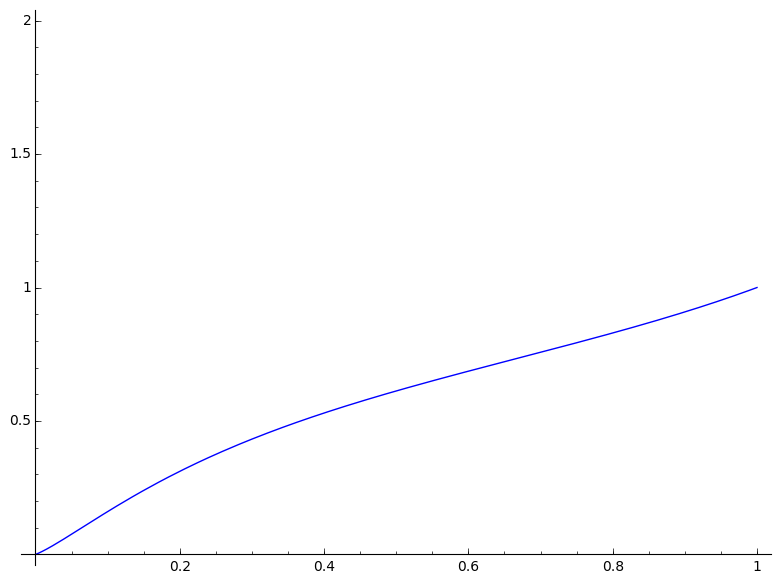

In [97]:
plot(lambda z: real(z^z^z), (0, 1), ymin=0, ymax=2)

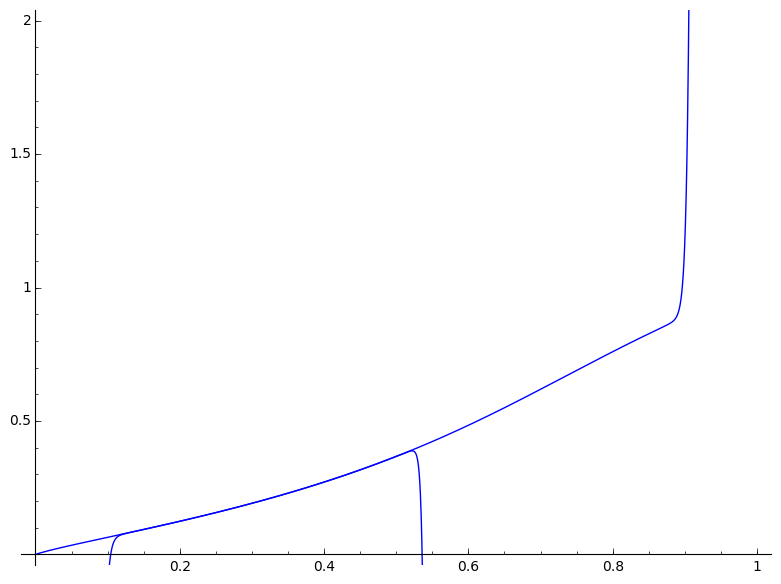

In [142]:
plot(lambda z: real(superroot_3_at0q25_series(z - 1/4)), (0, 1), ymin=0, ymax=2) + \
    plot(lambda z: real(superroot_3_at0q5_series(z - 1/2)), (0, 1), ymin=0, ymax=2)

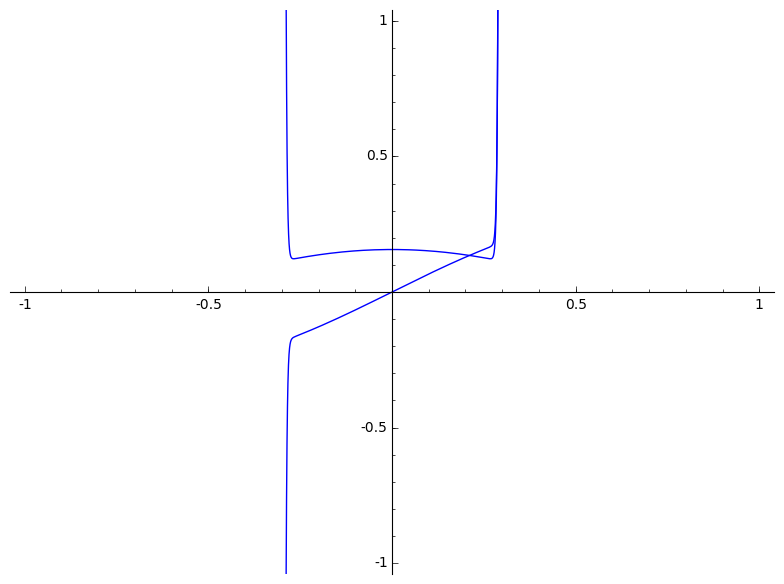

In [148]:
plot(lambda z: real(superroot_3_at0q25_series((1/4 + I*z) - 1/4)), (-1, 1), ymin=-1, ymax=1) + \
    plot(lambda z: imag(superroot_3_at0q25_series((1/4 + I*z) - 1/4)), (-1, 1), ymin=-1, ymax=1)

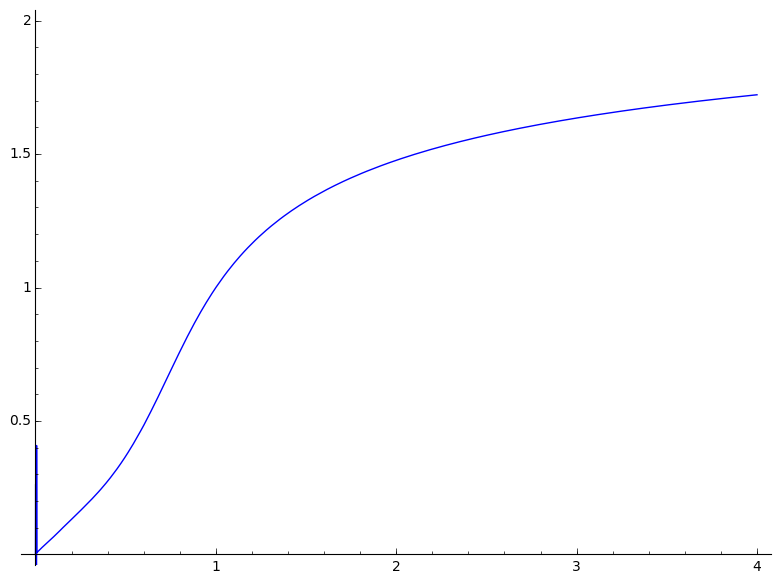

In [123]:
plot(lambda z: real(superroot_3(z)), (0, 4), ymin=0, ymax=2)


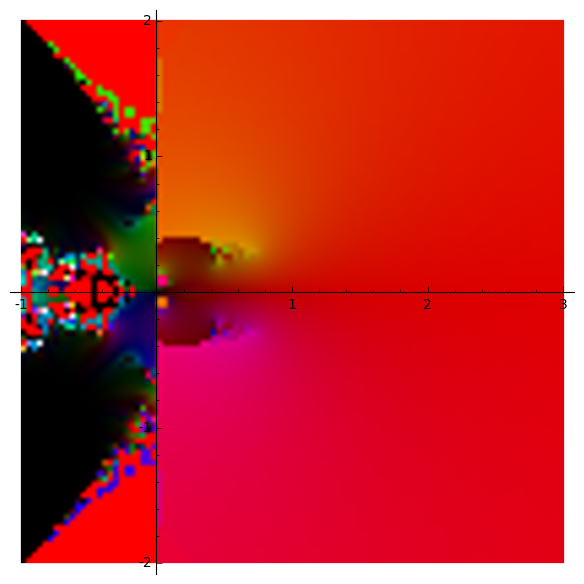

In [59]:
complex_plot(lambda z: superroot_3(z), (-1, 3), (-2, 2), aspect_ratio=1, plot_points=100)

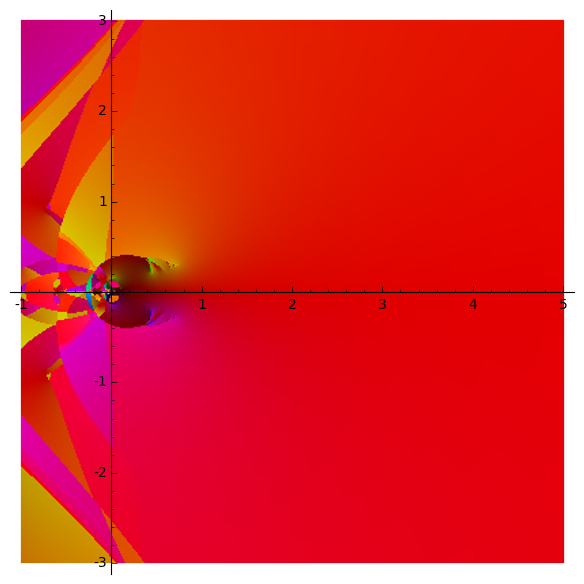

In [6]:
complex_plot(lambda z: superroot_3(z), (-2, 4), (-3, 3), aspect_ratio=1, plot_points=400)

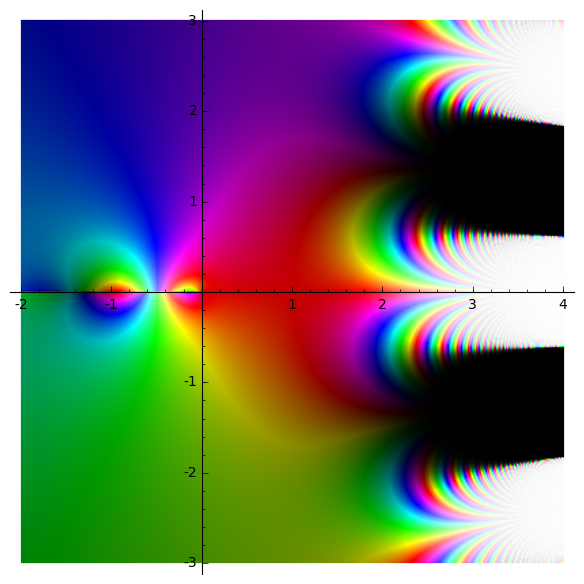

In [18]:
complex_plot(lambda z: z^z^z/z, (-2, 4), (-3, 3), aspect_ratio=1, plot_points=400)

In [41]:
PS.<x> = PowerSeriesRing(QQ)
superroot_3_at1_series(x, 10)

1 + 3*x - 3*x^2 + 2*x^3 + 35/6*x^4 - 51/2*x^5 + 5747/120*x^6 - 50/3*x^7 - 56269/280*x^8 + 52079/72*x^9 - 17977553/15120*x^10 + O(x^11)

In [42]:
PS.<x> = PowerSeriesRing(QQ)
superroot_3_exp_series(x, 10)

1 - 2*x + 11/2*x^2 - 13/3*x^3 - 133/12*x^4 + 264/5*x^5 - 12277/120*x^6 + 1157/35*x^7 + 32353/70*x^8 - 5037359/3024*x^9 + 3450893/1260*x^10 + O(x^11)

In [32]:
superroot_3_series_at_1(x, 10)

1 + 3*x - 3*x^2 + 2*x^3 + 35/6*x^4 - 51/2*x^5 + 5747/120*x^6 - 50/3*x^7 - 56269/280*x^8 + 52079/72*x^9 - 17977553/15120*x^10 + O(x^11)

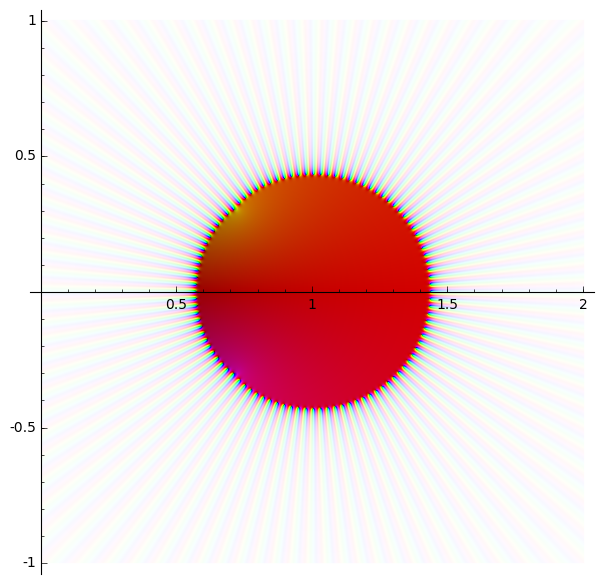

In [137]:
complex_plot(lambda z: superroot_3_at1_series(N(z - 1)), (0, 2), (-1, 1), aspect_ratio=1, plot_points=800)

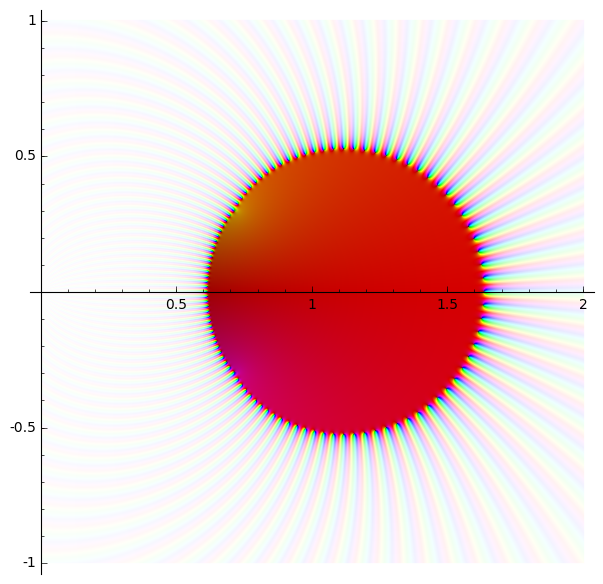

In [138]:
complex_plot(lambda z: superroot_3_exp_series(N(log(z))), (0, 2), (-1, 1), aspect_ratio=1, plot_points=800)

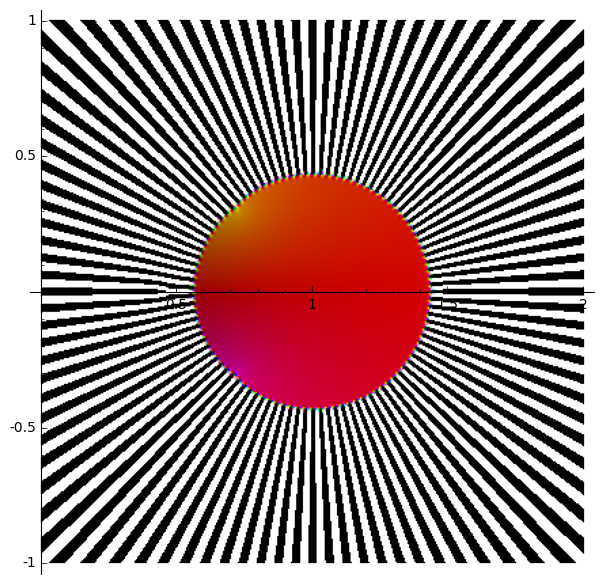

In [139]:
complex_plot(lambda z: exp(log_superroot_3_at1_series(N(z - 1))), (0, 2), (-1, 1), aspect_ratio=1, plot_points=400)

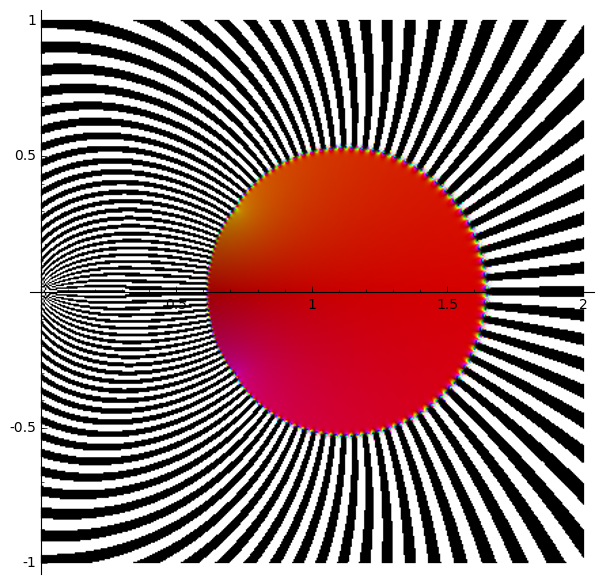

In [140]:
complex_plot(lambda z: exp(log_superroot_3_exp_series(N(log(z)))), (0, 2), (-1, 1), aspect_ratio=1, plot_points=400)

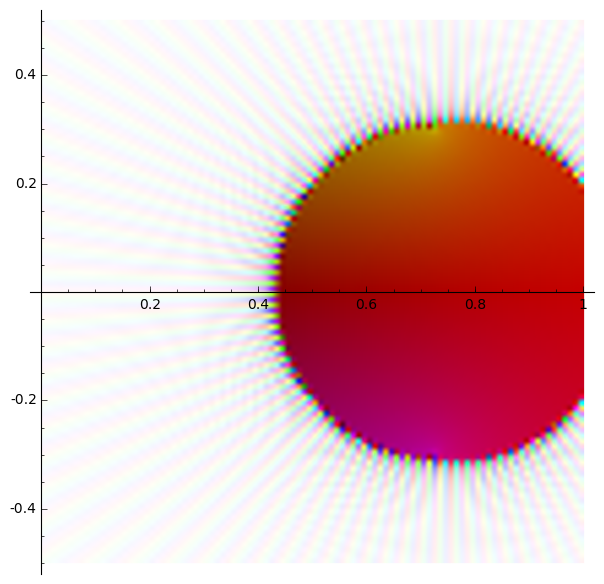

In [196]:
complex_plot(lambda z: superroot_3_at0q75_series(N(z - 3/4)), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

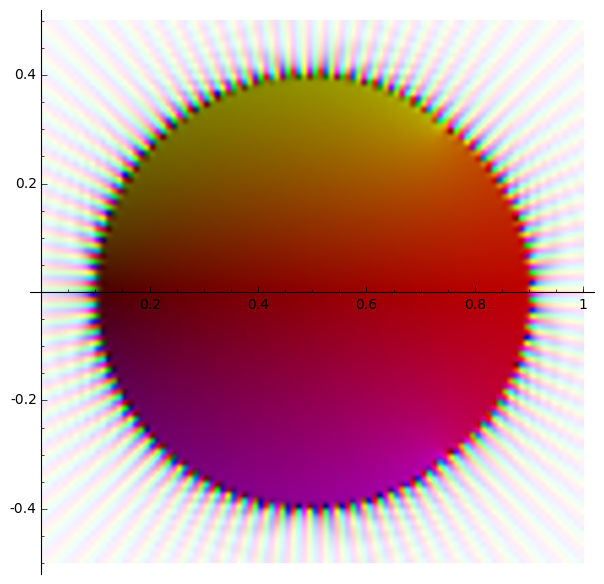

In [197]:
complex_plot(lambda z: superroot_3_at0q5_series(N(z - 1/2)), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

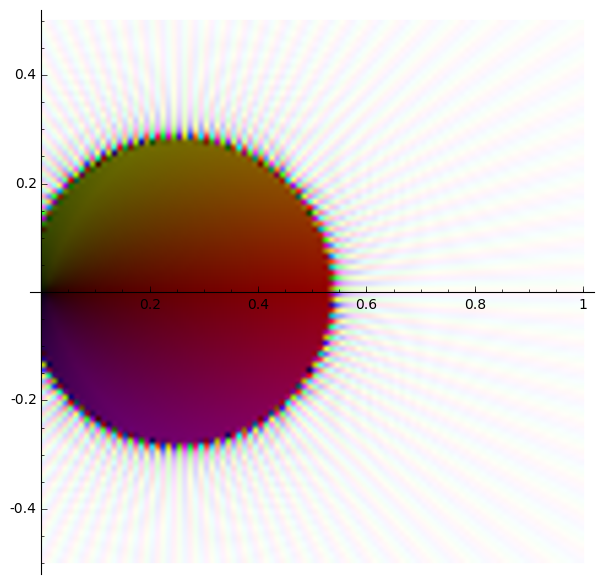

In [174]:
complex_plot(lambda z: superroot_3_at0q25_series(N(z - 1/4)), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

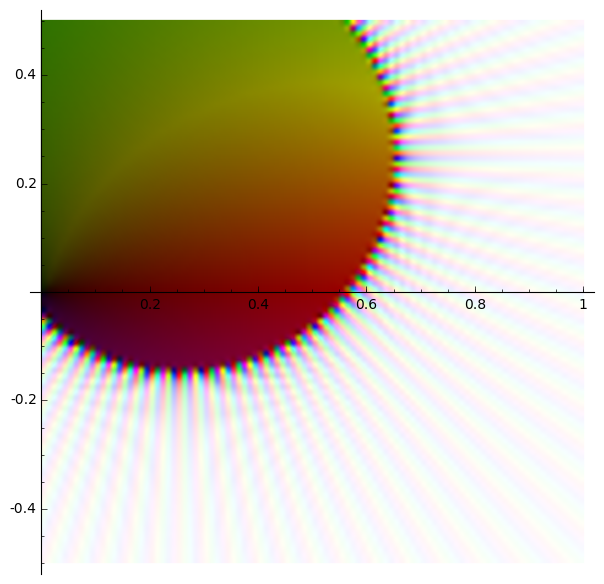

In [175]:
complex_plot(lambda z: superroot_3_at0q25i0q25_series(N(z - (1/4+1/4*I))), (0, 1), (-0.5, 0.5), aspect_ratio=1, plot_points=100)

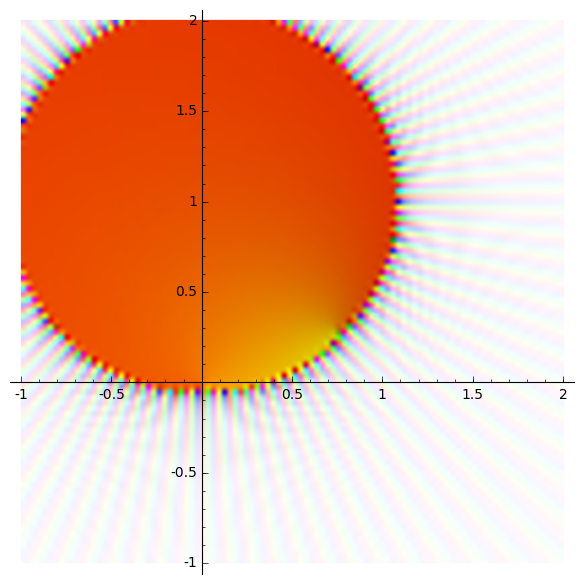

In [184]:
complex_plot(lambda z: superroot_3_at0i1_series(N(z - (I))), (-1, 2), (-1, 2), aspect_ratio=1, plot_points=100)


In [130]:
superroot_3_at1_series(x, 10)

1 + x - x^2 + 1/2*x^3 + 7/6*x^4 - 17/4*x^5 + 821/120*x^6 - 25/12*x^7 - 56269/2520*x^8 + 52079/720*x^9 - 1634323/15120*x^10 + O(x^11)

In [131]:
superroot_3_exp_series(x, 10)

1 + x - 1/2*x^2 - 1/3*x^3 + 11/8*x^4 - 23/15*x^5 - 139/144*x^6 + 2677/420*x^7 - 10549/1152*x^8 - 10147/2835*x^9 + 15965129/403200*x^10 + O(x^11)

In [132]:
log_superroot_3_at1_series(x, 10)

x - 3/2*x^2 + 11/6*x^3 - 13/12*x^4 - 133/60*x^5 + 44/5*x^6 - 12277/840*x^7 + 1157/280*x^8 + 32353/630*x^9 - 5037359/30240*x^10 + O(x^11)

In [133]:
log_superroot_3_exp_series(x, 10)

x - x^2 + 1/2*x^3 + 5/6*x^4 - 59/24*x^5 + 259/120*x^6 + 2311/720*x^7 - 65479/5040*x^8 + 594217/40320*x^9 + 5846471/362880*x^10 + O(x^11)

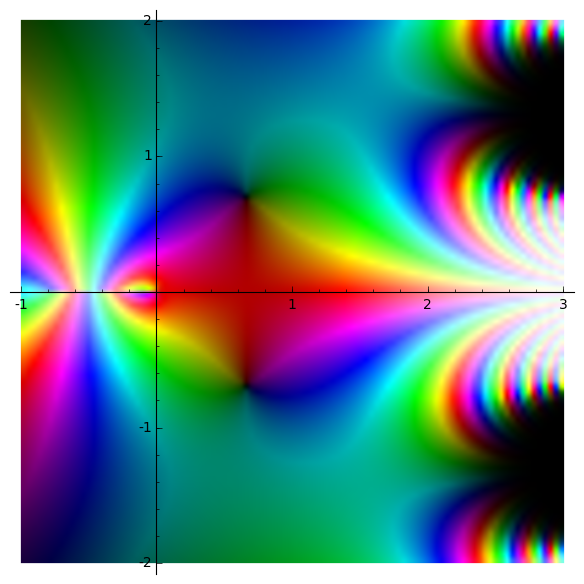

In [156]:
z = var('z')
complex_plot(lambda z0: diff(z^z^z, z).subs(z=z0), (-1, 3), (-2, 2), aspect_ratio=1, plot_points=100)

In [161]:
N(0.65731932736722314288467453537852139389275214355311193650961446766576216282945339736962888241306717182182175704374363688507681608958143904449562676035006995034720571464882803394931207939681520027247991 + 0.70437018286652984420243922977689300267957305149761082805104785900381664361150015372961645343583168753098101233614975859396238543744637536521746415824662316026080130008823152726203398178926934369445007*I)

0.657319327367223 + 0.704370182866530*I

In [189]:
complex_plot(lambda z: superroot_3(z), (0, 2), (-1, 1), aspect_ratio=1, plot_points=400)

KeyboardInterrupt: 

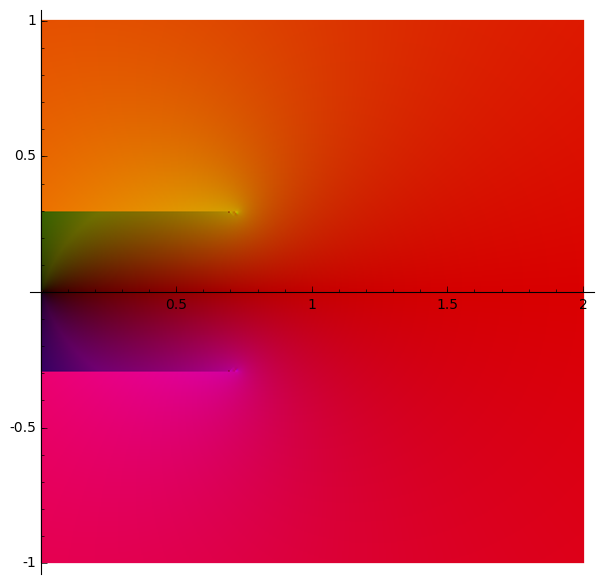

In [190]:
p = complex_plot(lambda z: superroot_3(z), (0, 2), (-1, 1), aspect_ratio=1, plot_points=400)
p

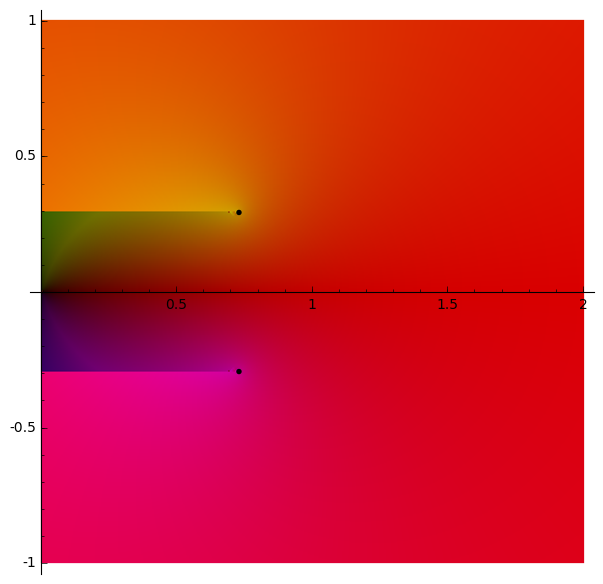

In [191]:
L1 = disk((0.731531897477381, +0.293308661285157), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
L2 = disk((0.731531897477381, -0.293308661285157), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
#L1 = disk((0.657319327367223, +0.704370182866530), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
#L2 = disk((0.657319327367223, -0.704370182866530), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
(p + L1 + L2)

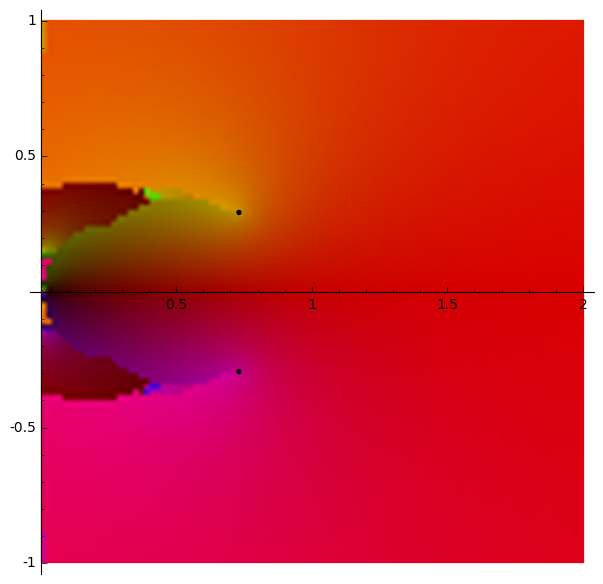

In [145]:
L1 = disk((0.731531897477381, +0.293308661285157), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
L2 = disk((0.731531897477381, -0.293308661285157), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
#L1 = disk((0.657319327367223, +0.704370182866530), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
#L2 = disk((0.657319327367223, -0.704370182866530), 0.01, (0, 2*pi), zorder=20, rgbcolor=(0, 0, 0))
(p + L1 + L2)

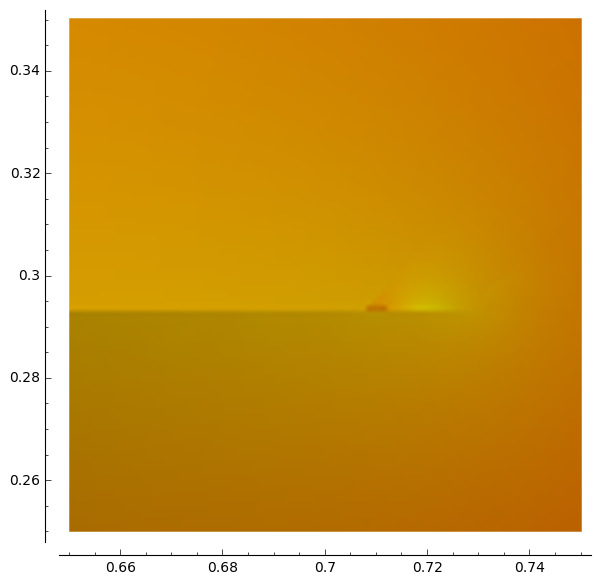

In [201]:
complex_plot(lambda z: superroot_3(z), (0.65, 0.75), (0.25, 0.35), aspect_ratio=1, plot_points=100)

In [163]:
(y^y^y).subs(y=(0.657319327367223+0.704370182866530*I))

0.731531897477381 + 0.293308661285157*I

In [165]:
(y^y^y).subs(y=(0.5))

0.612547326536066

In [190]:
(y^(y^y)).subs(y=(2))

16

In [175]:
z = var('z')
find_root(z^z^z == 1/2, 0.2, 0.5)

0.3673768528519844

In [46]:
superroot_3(0.612547326536066)

0.340478658874090

In [192]:
(y^(y^y)).subs(y=(N(-5+5*I)))

1.00000000057372 - 1.19433238799248e-9*I

In [193]:
(y^(y^y)).subs(y=(N(-4+6*I)))

0.999999998419248 - 2.01929711716291e-9*I

In [ ]:
newton_method(y^y^y - (1.00000000057372 - 1.19433238799248e-9*I), y, (-5+5*I), 10, 10^-5)

In [45]:
superroot_3_at0q5_series(0.5 - 0.5)

0.212699325093416

In [35]:
x,y = var('x,y')
f = function('f', x,y)
diff(f, x), diff(f, y)

(D[0](f)(x, y), D[1](f)(x, y))

In [32]:
D[0](f)(z)

NameError: name 'D' is not defined

In [37]:
diff(diff(f, y, 2), x, 3)

D[0, 0, 0, 1, 1](f)(x, y)

In [58]:
superroot_3(0.25)

0.00673343179891687

In [59]:
superroot_3(0.5)

0.212699325093416

In [60]:
superroot_3(0.75)

0.689537025983409

In [114]:
superroot_3_at0q5_series(0)

1.06094111912292

In [136]:
superroot_3_at0q25_series(0)

0.671536339256017

In [130]:
table([[N((lambda z: z^z^z)(1/k))] for k in range(1, 20)])

1.00000000000000
  0.612547326536066
  0.466855628173985
  0.375214227246482
  0.311458907098378
  0.264690952488173
  0.229087675497584
  0.201197427184677
  0.178839939165554
  0.160572720432121
  0.145405781317511
  0.132638844385223
  0.121763749196973
  0.112403561199348
  0.104273289349168
  0.0971538069609116
  0.0908741000878771
  0.0852989153069034
  0.0803199946062372

In [133]:
N((1/6)^(1/6)^(1/6))

0.264690952488173

In [137]:
float.fromhex('0x1.57d39c6e5c3d3c859a54f72484bep-1')

0.6715363392560172

In [170]:
SUPERROOT_CACHE['_@0.25+0.25*I#100']

[0.126211515493688 + 0.156806200417863*I,
 0.544785696041569 + 0.237946448504752*I,
 0.815401984032352 + 0.906085752738711*I,
 2.18030126242031 + 2.29762314253267*I,
 14.5450852749767 + 14.1060718435046*I,
 45.1580627593154 + 70.4515200874898*I,
 1167.10077305934 - 46.2691074673839*I,
 13090.8872273811 + 9937.70394688189*I,
 65247.0655086639 - 47932.6631049255*I,
 5.24744293483211e6 - 91292.3949638826*I,
 8.50437045853392e6 + 4.78311375625568e7*I,
 7.52876759371254e8 - 1.63183234810161e9*I,
 5.28192623533139e10 + 2.57517470876917e10*I,
 -9.60890179022381e11 - 5.84653022674721e10*I,
 4.39038736235316e13 - 3.96152407843399e13*I,
 3.33128833563517e14 + 1.62084114485798e15*I,
 -4.14793404680390e16 - 5.49944401704173e16*I,
 3.24839818230484e18 - 1.64917286145867e17*I,
 -8.99716248885814e19 + 8.59420329562385e19*I,
 5.09373344335366e20 - 6.79674089879175e21*I,
 2.30900494609181e23 + 2.32910452055658e23*I,
 -1.73626425113811e25 - 1.62287305358691e24*I,
 7.68051424122112e26 - 6.75863605401203e

In [163]:
CC

Complex Field with 53 bits of precision

In [182]:
superroot_3(1.0*I)

1.07896923570668 + 0.853659864502030*I

In [202]:
superroot_3(1.0 + 1.0*I)

1.47891711535105 + 0.417214343746479*I